In [3]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
print(df.head(2))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148           72.0           35.0      0.0  33.6   
1          1.0       85           66.0           29.0      0.0  26.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  


In [4]:
df.drop(['Pregnancies','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'], inplace=True, axis=1)
df=df.dropna()

In [5]:
X=df.drop(['Outcome'],axis=1)
Y=df["Outcome"]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [8]:
y_pred=model.predict(X_test)
print(y_pred[:5])

[1. 0. 0. 1. 0.]


In [9]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,matthews_corrcoef,classification_report
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("Precision: ",precision_score(Y_test,y_pred,average="weighted"))
print("Recall: ",recall_score(Y_test,y_pred,average="weighted"))
print("F1: ",f1_score(Y_test,y_pred,average="weighted"))
print("MCC: ",matthews_corrcoef(Y_test,y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test,y_pred))
print("Classification report: \n",classification_report(Y_test,y_pred))

Accuracy:  0.7445887445887446
Precision:  0.732126588008941
Recall:  0.7445887445887446
F1:  0.7298067234447057
MCC:  0.37270128011383125
Confusion matrix: 
 [[139  18]
 [ 41  33]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.77      0.89      0.82       157
         1.0       0.65      0.45      0.53        74

    accuracy                           0.74       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.73      0.74      0.73       231



<AxesSubplot:>

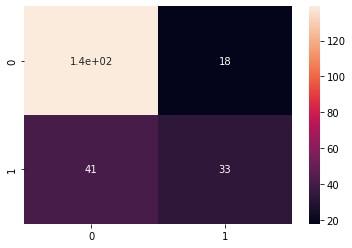

In [10]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)

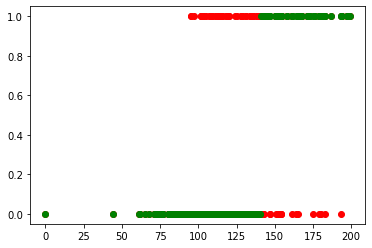

In [11]:
import matplotlib.pyplot as plt
import numpy as np
X_test.values.reshape(-1,1)
plt.scatter(X_test,Y_test,c="Red")
plt.scatter(X_test,y_pred,c="Green")